<a href="https://colab.research.google.com/github/kiakass/DeepLearning/blob/master/mnist_conv2d_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

from keras.datasets import mnist

from keras.utils import np_utils

In [8]:
mnist = tf.keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
num_classes = 10
input_shape = (28, 28, 1)

In [10]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices, onehot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
help(mnist)

Help on package tensorflow.keras.datasets.mnist in tensorflow.keras.datasets:

NAME
    tensorflow.keras.datasets.mnist - MNIST handwritten digits dataset.

PACKAGE CONTENTS


FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py




In [13]:
model = Sequential()

## 학습자동중단 : EarlyStopping

In [14]:
from keras.callbacks import EarlyStopping

In [61]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(50, activation = 'relu', kernel_initializer='he_normal'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 256)       73984     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 128)       295040    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 64)         

In [62]:
import time
start = time.time()  # 시작 시간 저장

batch_size = 128
epochs = 100

# model compile
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Early Stop : patience #n 회 이상 val_loss 가 변화가 없으면 중단
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

# model fit
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=early_stopping_callback)
model.evaluate(x_test,  y_test, verbose=2)

print( "Spend time : %.3f sec" % (time.time() - start ))

Epoch 1/100
422/422 [==============================] - 4s 9ms/step - loss: 0.6205 - accuracy: 0.7945 - val_loss: 0.1938 - val_accuracy: 0.9790
Epoch 2/100
422/422 [==============================] - 3s 8ms/step - loss: 0.2086 - accuracy: 0.9375 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 3/100
422/422 [==============================] - 3s 8ms/step - loss: 0.1466 - accuracy: 0.9569 - val_loss: 0.0461 - val_accuracy: 0.9877
Epoch 4/100
422/422 [==============================] - 3s 8ms/step - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.0373 - val_accuracy: 0.9897
Epoch 5/100
422/422 [==============================] - 3s 8ms/step - loss: 0.1017 - accuracy: 0.9696 - val_loss: 0.0389 - val_accuracy: 0.9903
Epoch 6/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0881 - accuracy: 0.9733 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 7/100
422/422 [==============================] - 3s 8ms/step - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.0380 - val_accuracy: 0.9902

In [63]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

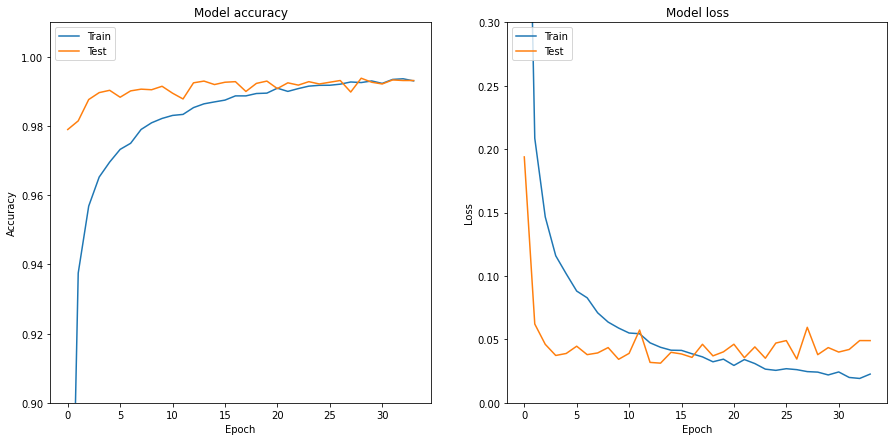

In [65]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, validation_split=0.25, epochs=5, batch_size=100, verbose=1)
#history.val = model.fit(x_test, y_test, validation_split=0.25, epochs=50, batch_size=16, verbose=1)
plt.figure(figsize=(15,7))

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.90,1.01)
plt.legend(['Train', 'Test'], loc='upper left')

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.0,0.3)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [66]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
